## Assignment 1


In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from statsmodels.formula.api import ols
from scipy.stats import norm, probplot
from sklearn.preprocessing import StandardScaler


db_dir = os.getcwd()
df = pd.read_csv(db_dir + r'/data/train.csv')

In [9]:
# Drop columns where more than 20% of the data is missing
missing_percentage = df.isnull().mean() * 100
columns_to_drop = missing_percentage[missing_percentage > 20].index
df_missingvaluesremoved = df.drop(columns=columns_to_drop, inplace=True)
print(missing_percentage[missing_percentage > 20])

Alley          93.767123
MasVnrType     59.726027
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


In [14]:
# Fill in Missing values with either null or 0 depending on the data type
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna('None', inplace=True)
    else:
        df[col].fillna(0, inplace=True)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

Original dataset shape: (1460, 75)


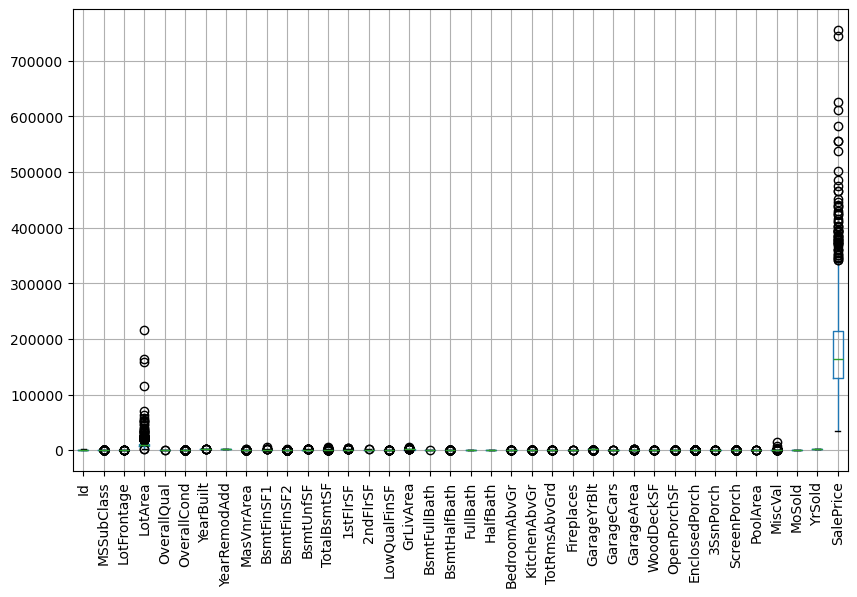

Dataset shape after removing outliers: (973, 75)


In [29]:
from scipy import stats

z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outlier_indices = np.where(z_scores > 3)[0]
outliers = df.iloc[outlier_indices]

print("Original dataset shape:", df.shape)

df.boxplot(figsize=(10, 6))
plt.xticks(rotation=90)  # Rotate column names if needed
plt.show()

df_no_outliers = df.drop(index=outlier_indices)
print("Dataset shape after removing outliers:", df_no_outliers.shape)
df_no_outliers.columns
df_no_outliers.to_csv('df_no_outliers.csv')

In [ ]:
# Assuming df_cleaned is your DataFrame
Xinitial = df_cleaned[['circuitId','driverId', 'grid', 'stop', 'rank', 'Race_Circuit', 'Street_Circuit', 'laps', 'year', 'constructorId','points']]
yinitial = df_cleaned['cumulative_time_seconds']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(Xinitial, yinitial, train_size=0.75, random_state=0)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS model
model = sm.OLS(y_train, X_train)
results = model.fit()
print("OLS Model Summary:")
print(results.summary())

# To Handle multicolinearity
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

# Predicting on the training data
predicted_y = results.predict(X_train)
residuals = y_train - predicted_y

# Plotting the residuals
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
# Histogram of residuals
sns.histplot(residuals, kde=True, ax=ax[0])
ax[0].set_title('Histogram of Residuals')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')
# Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')
# Residuals vs. fitted values
ax[2].scatter(results.fittedvalues, residuals)
ax[2].axhline(0, color='red', linestyle='dashed', linewidth=2)
ax[2].set_title('Residuals vs. Fitted Values')
ax[2].set_xlabel('Fitted Values')
ax[2].set_ylabel('Residuals')
plt.tight_layout()
plt.show()